### Libraries 

In [1]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn

### Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV File

In [3]:
df = pd.read_csv("student_scores.csv") #Read csv file
print(df.head()) #Print the first 5 rows

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

### Data Information

In [4]:
#Data description
df.describe() 

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
#Null value count
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop unnamed column

In [7]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


### Gender distribution



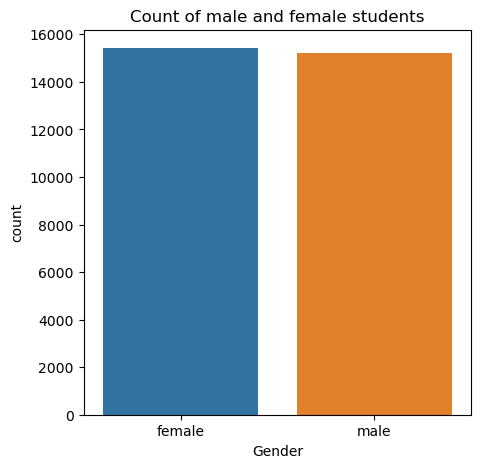

In [8]:
plt.figure(figsize = (5,5))
cp = sns.countplot(data = df, x="Gender")
cp.set_title("Count of male and female students")
plt.show()

From the above chart we have analysed that:
The number of females in the data is more than number of males

### Impact of parent education on scores 

In [9]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


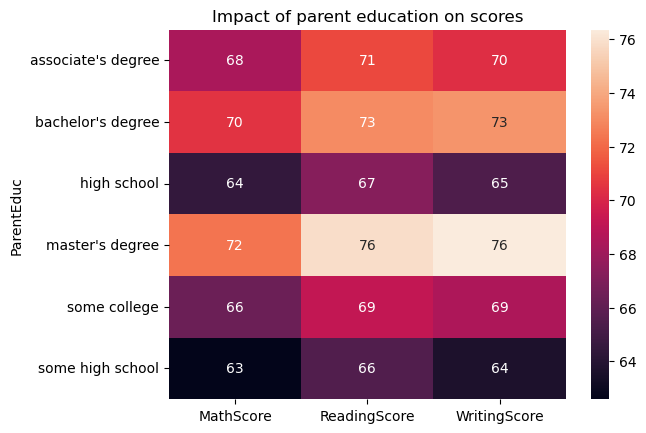

In [10]:
sns.heatmap(gb, annot = True)
plt.title("Impact of parent education on scores")
plt.show()

From the above chart we have concluded that:
Education of the parents have impact on student scores
We can see that the scores of students whose parents have master's degree have the highest scores whereas the scores of students whose parents have passed out from a random highschool have the least scores.

### Impact of marital status  of parents on scores


In [12]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


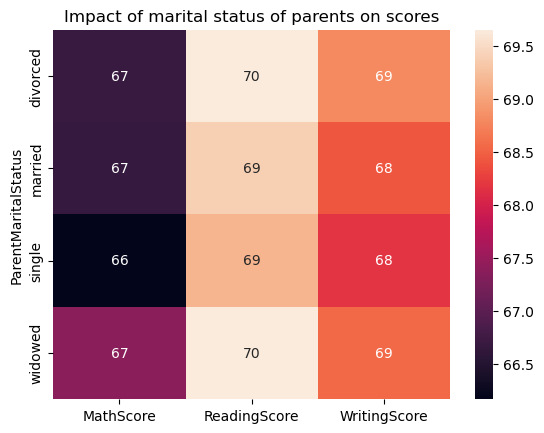

In [13]:
sns.heatmap(gb1, annot = True)
plt.title("Impact of marital status of parents on scores")
plt.show()

From the above chart we have concluded that:
The marital status of parents have negligible impact on Student scores

### Box plot for Maths Score 

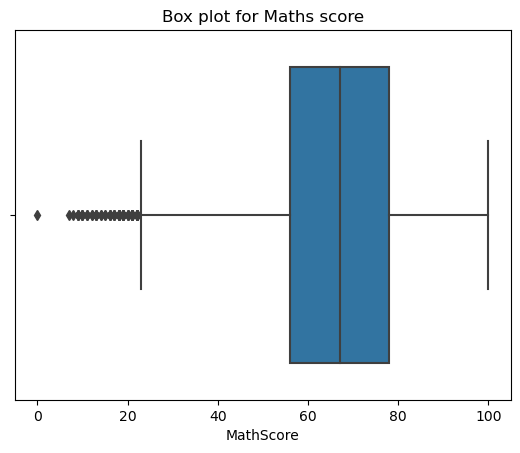

In [14]:
sns.boxplot(data = df, x = "MathScore")
plt.title("Box plot for Maths score")
plt.show()

### Boxplots to visualize the distribution of scores

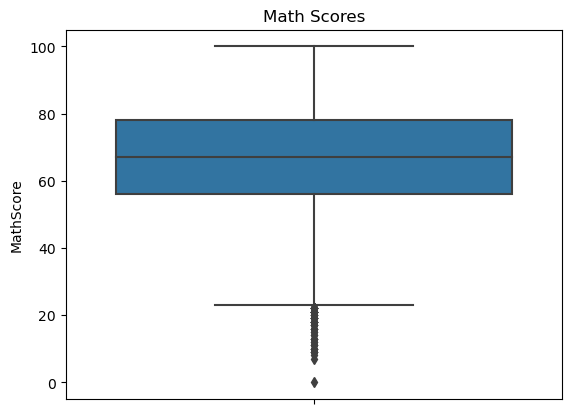

Upper Quartile: 78.0
Lower Quartile: 56.0
Number of outliers in Math Scores: 76


In [15]:
#Math score
sns.boxplot(y='MathScore', data=df)
plt.title('Math Scores')
plt.show()

# Calculate interquartile range (IQR)
Q1 = df['MathScore'].quantile(0.25)
Q3 = df['MathScore'].quantile(0.75)
IQR = Q3 - Q1
print("Upper Quartile:", Q3)
print("Lower Quartile:", Q1)

# Determine outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count outliers
outliers_count = ((df['MathScore'] < lower_threshold) | (df['MathScore'] > upper_threshold)).sum()
print("Number of outliers in Math Scores:", outliers_count)

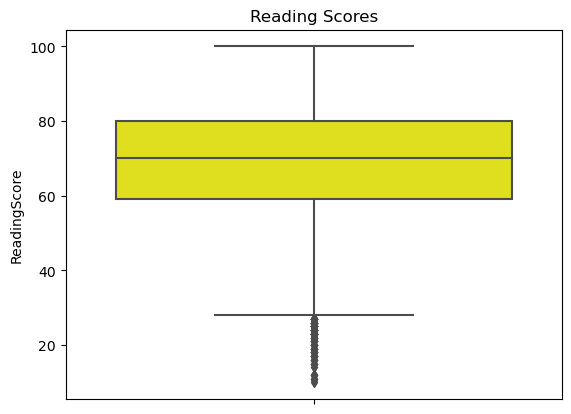

Upper Quartile: 80.0
Lower Quartile: 59.0
Number of outliers in Reading Scores: 90


In [16]:
#Reading scores
sns.boxplot(y='ReadingScore', data=df, color='yellow')
plt.title('Reading Scores')
plt.show()

# Calculate interquartile range (IQR)
Q1 = df['ReadingScore'].quantile(0.25)
Q3 = df['ReadingScore'].quantile(0.75)
IQR = Q3 - Q1
print("Upper Quartile:", Q3)
print("Lower Quartile:", Q1)

# Determine outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count outliers
outliers_count = ((df['ReadingScore'] < lower_threshold) | (df['ReadingScore'] > upper_threshold)).sum()
print("Number of outliers in Reading Scores:", outliers_count)

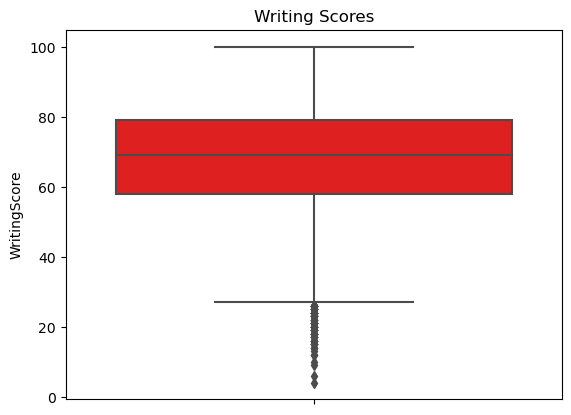

Upper Quartile: 79.0
Lower Quartile: 58.0
Number of outliers in Writing Scores: 109


In [17]:
#Writing score
sns.boxplot(y='WritingScore', data=df, color='red')
plt.title('Writing Scores')
plt.show()

# Calculate interquartile range (IQR)
Q1 = df['WritingScore'].quantile(0.25)
Q3 = df['WritingScore'].quantile(0.75)
IQR = Q3 - Q1
print("Upper Quartile:", Q3)
print("Lower Quartile:", Q1)

# Determine outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count outliers
outliers_count = ((df['WritingScore'] < lower_threshold) | (df['WritingScore'] > upper_threshold)).sum()
print("Number of outliers in Writing Scores:", outliers_count)

### Distribution of numerical columns

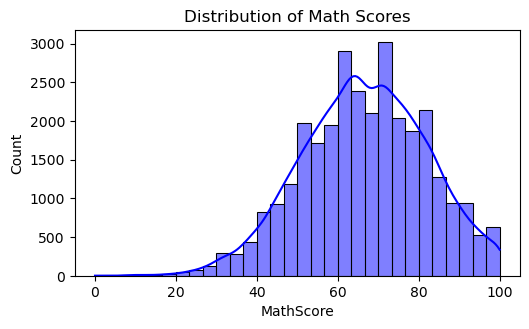

In [18]:
#Math scores
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['MathScore'], kde=True, color='blue', bins=30)
plt.title('Distribution of Math Scores')
plt.tight_layout()
plt.show()

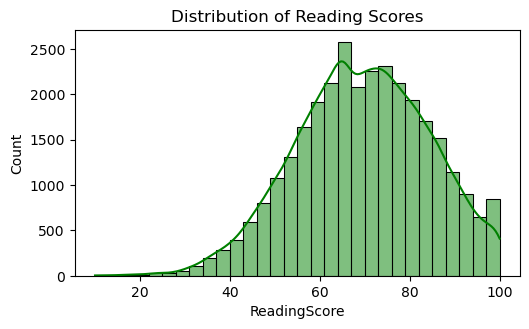

In [19]:
#Reading scores
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 2)
sns.histplot(df['ReadingScore'], kde=True, color='green', bins=30)
plt.title('Distribution of Reading Scores')
plt.tight_layout()
plt.show()

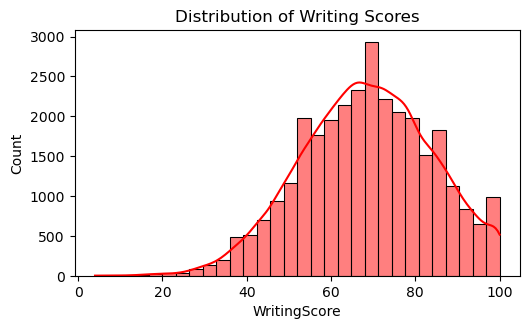

In [20]:
#Writing scores
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 3)
sns.histplot(df['WritingScore'], kde=True, color='red', bins=30)
plt.title('Distribution of Writing Scores')
plt.tight_layout()
plt.show()


### Impact of transport means on scores

<Figure size 1000x600 with 0 Axes>

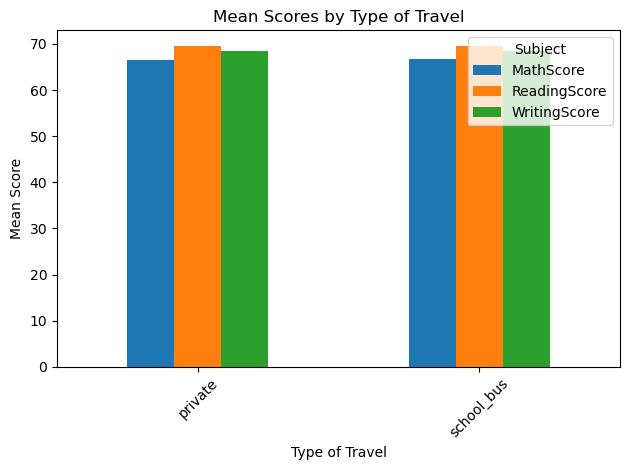

In [73]:
# Group the data by 'TransportMeans' and calculate mean scores
transport_means_scores = df.groupby('TransportMeans').mean(numeric_only=True)[['MathScore', 'ReadingScore', 'WritingScore']]

# Plotting the mean scores for each type of travel
plt.figure(figsize=(10, 6))
transport_means_scores.plot(kind='bar')
plt.title('Mean Scores by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

### Distribution of ethnic groups

In [92]:
#Types
print(df["EthnicGroup"].unique()) 

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503, 4041]


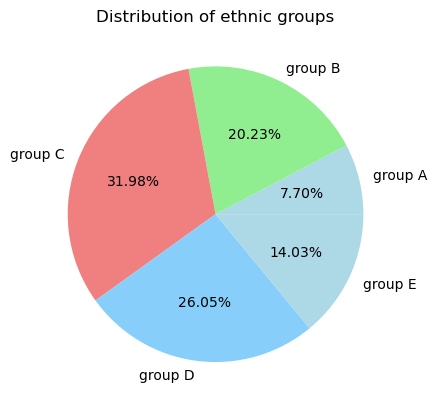

In [119]:
#Group A data
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()

#Group B  data
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()

#Group C data
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()

#Group D data
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()

#Group E data
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
l = ["group A","group B","group C","group D","group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
print(mlist)

plt.pie(mlist,labels = l,autopct= "%1.2f%%",colors=custom_colors)
plt.title("Distribution of ethnic groups")
plt.show()